# Notebook Title - Dataset Cleaning and EDA

In this notebook we will preprocess Penguins and Diamonds dataset and perform some EDA steps on them.

Penguins Dataset stored at data/penguins.csv

Diamonds Dataset stored at data/diamonds.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Preprocessing Penguins Dataset

In [2]:
penguins = pd.read_csv('data/penguins.csv')

In [3]:
penguins.shape

(344, 10)

In [4]:
penguins.head(100)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
95,Adelie,Dream,5012,10,40.8,18.9,208.0,4300.0,male,2008.0
96,Adelie,Dream,6454,9,38.1,18.6,190.0,3700.0,female,2008.0
97,Adelie,Dream,3904,13,40.3,18.5,196.0,4350.0,male,2008.0
98,Adelie,Dream,6156,8,33.1,16.1,178.0,2900.0,female,2008.0


In [5]:
penguins.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [6]:
penguins.dtypes

species                    object
island                     object
calorie requirement         int64
average sleep duration      int64
bill_length_mm            float64
bill_depth_mm             float64
flipper_length_mm         float64
body_mass_g               float64
gender                     object
year                      float64
dtype: object

In [7]:
penguins.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


In [8]:
penguins.isna().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

In [9]:
penguins.loc[penguins.isna().any(axis=1)]

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
8,Adelie,Torgersen,5593,8,34.10,18.10,193.0,3475.0,NaN,2007.0
9,Adelie,Torgersen,6275,7,42.00,20.20,190.0,4250.0,NaN,2007.0
10,Adelie,Torgersen,5135,10,37.80,17.10,186.0,3300.0,NaN,2007.0
11,Adelie,Torgersen,6021,7,37.80,17.30,180.0,3700.0,NaN,2007.0
17,adelie,Torgersen,6543,8,82.40,20.70,197.0,4500.0,NaN,2007.0
21,NaN,NaN,4138,8,82.47,18.70,180.0,3600.0,male,2007.0
36,NaN,Dream,3758,7,38.80,89.21,190.0,3950.0,male,2007.0
47,Adelie,Dream,5939,7,37.50,18.90,179.0,2975.0,NaN,2007.0
72,Adelie,torgersen,3955,12,119.89,17.20,196.0,NaN,NaN,2008.0


In [10]:
#Filling na values
penguins_median_filled = penguins.fillna(value = {'bill_length_mm':penguins.bill_length_mm.median(),
                         'bill_depth_mm':penguins.bill_depth_mm.median(),
                         'flipper_length_mm':penguins.flipper_length_mm.median(),
                         'body_mass_g':penguins.body_mass_g.median()})

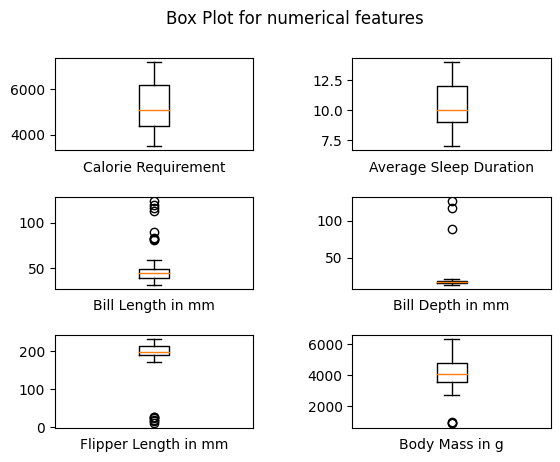

In [11]:
'''
Box Plots for numerical features Calorie Requirement, Average Sleep Duration, Bill Length mm, Bill Depth mm, Flipper Length mm, Body Mass g
'''

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2)

ax1.boxplot(penguins_median_filled['calorie requirement'])
ax1.set_xticks([])
ax1.set_xlabel('Calorie Requirement')

ax2.boxplot(penguins_median_filled['average sleep duration'])
ax2.set_xticks([])
ax2.set_xlabel('Average Sleep Duration')

ax3.boxplot(penguins_median_filled['bill_length_mm'])
ax3.set_xticks([])
ax3.set_xlabel('Bill Length in mm')

ax4.boxplot(penguins_median_filled['bill_depth_mm'])
ax4.set_xticks([])
ax4.set_xlabel('Bill Depth in mm')

ax5.boxplot(penguins_median_filled['flipper_length_mm'])
ax5.set_xticks([])
ax5.set_xlabel('Flipper Length in mm')

ax6.boxplot(penguins_median_filled['body_mass_g'])
ax6.set_xticks([])
ax6.set_xlabel('Body Mass in g')

fig.suptitle("Box Plot for numerical features")
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()


In [12]:
penguins_median_filled.isna().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             0
bill_depth_mm              0
flipper_length_mm          0
body_mass_g                0
gender                    17
year                       2
dtype: int64

In [13]:
penguins_median_filled.loc[penguins.isna().any(axis=1)]

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
3,Adelie,Torgersen,4169,8,45.10,17.30,197.0,992.0,NaN,2007.0
8,Adelie,Torgersen,5593,8,34.10,18.10,193.0,3475.0,NaN,2007.0
9,Adelie,Torgersen,6275,7,42.00,20.20,190.0,4250.0,NaN,2007.0
10,Adelie,Torgersen,5135,10,37.80,17.10,186.0,3300.0,NaN,2007.0
11,Adelie,Torgersen,6021,7,37.80,17.30,180.0,3700.0,NaN,2007.0
17,adelie,Torgersen,6543,8,82.40,20.70,197.0,4500.0,NaN,2007.0
21,NaN,NaN,4138,8,82.47,18.70,180.0,3600.0,male,2007.0
36,NaN,Dream,3758,7,38.80,89.21,190.0,3950.0,male,2007.0
47,Adelie,Dream,5939,7,37.50,18.90,179.0,2975.0,NaN,2007.0
72,Adelie,torgersen,3955,12,119.89,17.20,196.0,4050.0,NaN,2008.0


In [14]:
penguins_impuned = penguins_median_filled.dropna()

In [15]:
penguins_impuned.head(100)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,Adelie,Torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0
...,...,...,...,...,...,...,...,...,...,...
107,Adelie,Biscoe,6014,10,38.2,20.0,190.0,3900.0,male,2009.0
108,Adelie,Biscoe,4334,12,38.1,17.0,181.0,3175.0,female,2009.0
109,Adelie,Biscoe,5010,14,43.2,19.0,197.0,4775.0,male,2009.0
110,Adelie,Biscoe,6122,13,38.1,16.5,198.0,3825.0,female,2009.0


In [16]:
#standardizing text features
penguins_impuned.species = penguins_impuned.species.str.lower()
penguins_impuned.island = penguins_impuned.island.str.lower()
penguins_impuned.gender = penguins_impuned.gender.str.lower()

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
penguins_impuned.head(100)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,adelie,torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,adelie,torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0
...,...,...,...,...,...,...,...,...,...,...
107,adelie,biscoe,6014,10,38.2,20.0,190.0,3900.0,male,2009.0
108,adelie,biscoe,4334,12,38.1,17.0,181.0,3175.0,female,2009.0
109,adelie,biscoe,5010,14,43.2,19.0,197.0,4775.0,male,2009.0
110,adelie,biscoe,6122,13,38.1,16.5,198.0,3825.0,female,2009.0


In [18]:
penguins_impuned.species.unique()

array(['adelie', 'gentoo', 'chinstrap'], dtype=object)

In [19]:
penguins_impuned.island.unique()

array(['torgersen', 'biscoe', 'dream'], dtype=object)

In [20]:
penguins_impuned.gender.unique()

array(['male', 'female'], dtype=object)

In [21]:
#Outlier Removal
bill_length_mm_Q1 = penguins_impuned.bill_length_mm.quantile(0.25)
bill_length_mm_Q3 = penguins_impuned.bill_length_mm.quantile(0.75)
bill_length_mm_IQR = bill_length_mm_Q3 - bill_length_mm_Q1
bill_length_mm_lower = bill_length_mm_Q1 - 1.5*bill_length_mm_IQR
bill_length_mm_upper = bill_length_mm_Q3 + 1.5*bill_length_mm_IQR

bill_length_mm_outlier_array = penguins_impuned[(penguins_impuned['bill_length_mm'] < bill_length_mm_lower) | (penguins_impuned['bill_length_mm'] > bill_length_mm_upper)]
penguins_impuned.loc[bill_length_mm_outlier_array.index, 'bill_length_mm'] = penguins_impuned.bill_length_mm.median()

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
bill_length_mm_outlier_array

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
322,chinstrap,dream,3802,9,83.27,17.9,19.0,3400.0,female,2009.0
335,chinstrap,dream,7195,13,112.75,19.4,194.0,3525.0,female,2009.0


In [23]:
#Outlier Removal
bill_depth_mm_Q1 = penguins_impuned.bill_depth_mm.quantile(0.25)
bill_depth_mm_Q3 = penguins_impuned.bill_depth_mm.quantile(0.75)
bill_depth_mm_IQR = bill_depth_mm_Q3 - bill_depth_mm_Q1
bill_depth_mm_lower = bill_depth_mm_Q1 - 1.5*bill_depth_mm_IQR
bill_depth_mm_upper = bill_depth_mm_Q3 + 1.5*bill_depth_mm_IQR

bill_depth_mm_outlier_array = penguins_impuned[(penguins_impuned['bill_depth_mm'] < bill_depth_mm_lower) | (penguins_impuned['bill_depth_mm'] > bill_depth_mm_upper)]
penguins_impuned.loc[bill_depth_mm_outlier_array.index, 'bill_depth_mm'] = penguins_impuned.bill_depth_mm.median()

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
bill_depth_mm_outlier_array

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
161,gentoo,biscoe,4743,12,46.8,127.26,215.0,5150.0,male,2007.0


In [25]:
#Outlier Removal
flipper_length_mm_Q1 = penguins_impuned.flipper_length_mm.quantile(0.25)
flipper_length_mm_Q3 = penguins_impuned.flipper_length_mm.quantile(0.75)
flipper_length_mm_IQR = flipper_length_mm_Q3 - flipper_length_mm_Q1
flipper_length_mm_lower = flipper_length_mm_Q1 - 1.5*flipper_length_mm_IQR
flipper_length_mm_upper = flipper_length_mm_Q3 + 1.5*flipper_length_mm_IQR

flipper_length_mm_outlier_array = penguins_impuned[(penguins_impuned['flipper_length_mm'] < flipper_length_mm_lower) | (penguins_impuned['flipper_length_mm'] > flipper_length_mm_upper)]
penguins_impuned.loc[flipper_length_mm_outlier_array.index, 'flipper_length_mm'] = penguins_impuned.flipper_length_mm.median()

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
flipper_length_mm_outlier_array

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
238,gentoo,biscoe,4839,8,43.4,14.4,17.0,4600.0,female,2009.0
297,chinstrap,dream,4843,9,48.5,17.5,10.0,3400.0,male,2007.0
322,chinstrap,dream,3802,9,44.5,17.9,19.0,3400.0,female,2009.0


In [27]:
penguins_impuned.head(100)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,adelie,torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,adelie,torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0
...,...,...,...,...,...,...,...,...,...,...
107,adelie,biscoe,6014,10,38.2,20.0,190.0,3900.0,male,2009.0
108,adelie,biscoe,4334,12,38.1,17.0,181.0,3175.0,female,2009.0
109,adelie,biscoe,5010,14,43.2,19.0,197.0,4775.0,male,2009.0
110,adelie,biscoe,6122,13,38.1,16.5,198.0,3825.0,female,2009.0


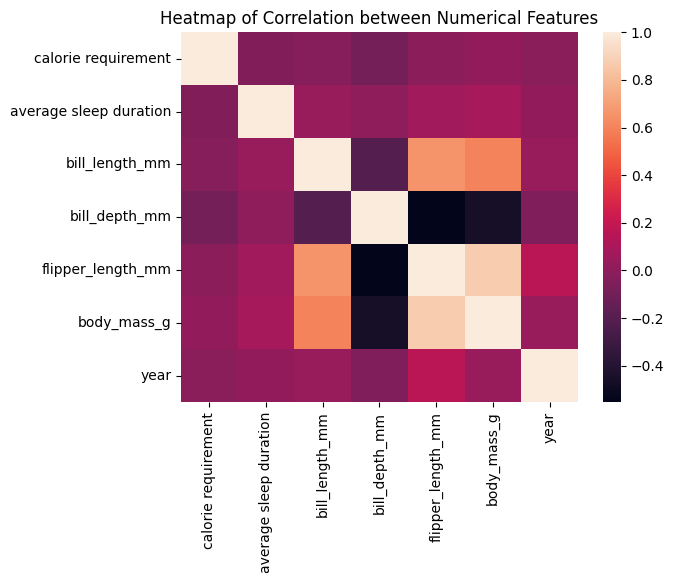

In [28]:
'''
Heatmap of correlation between numerical features
'''
corrMatrix = penguins_impuned.corr()
fig = sb.heatmap(corrMatrix).set(title = "Heatmap of Correlation between Numerical Features")
plt.show()

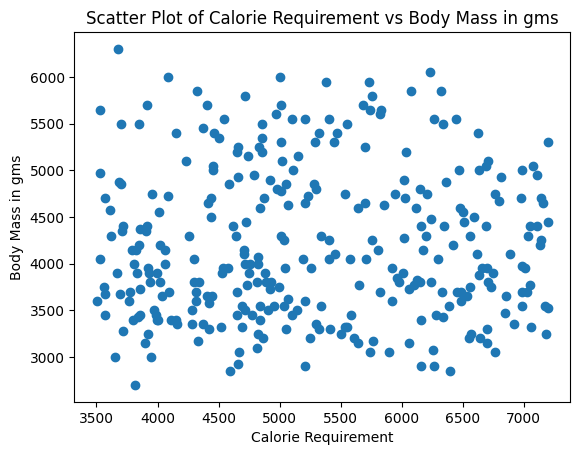

In [29]:
'''
Scatter Plot of Calorie Requirement vs Body Mass in gms
'''
plt.scatter(penguins_impuned['calorie requirement'],penguins_impuned['body_mass_g'])
plt.title("Scatter Plot of Calorie Requirement vs Body Mass in gms")
plt.xlabel("Calorie Requirement")
plt.ylabel("Body Mass in gms")
plt.show()

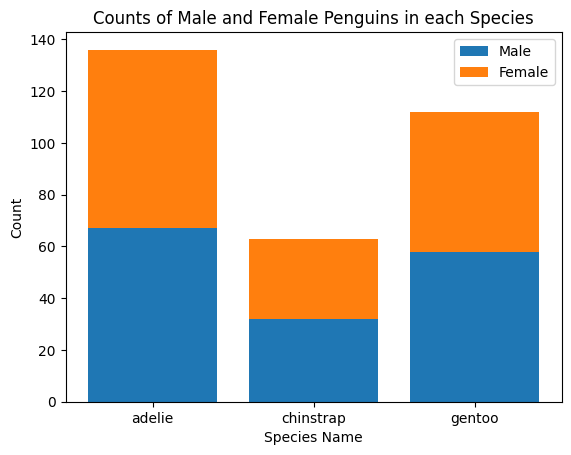

In [30]:
'''
Counts of Male and Female Penguins in each Species
'''
gender_vs_species = penguins_impuned.groupby(['species','gender']).size().unstack()
gender_vs_species.head(100)

female_count = gender_vs_species['female']
male_count = gender_vs_species['male']
species_list = gender_vs_species.index

plt.bar(species_list,male_count, label = "Male")
plt.bar(species_list,female_count,bottom = male_count, label = "Female")
plt.title("Counts of Male and Female Penguins in each Species")
plt.xlabel("Species Name")
plt.ylabel("Count")
plt.legend()
plt.show()

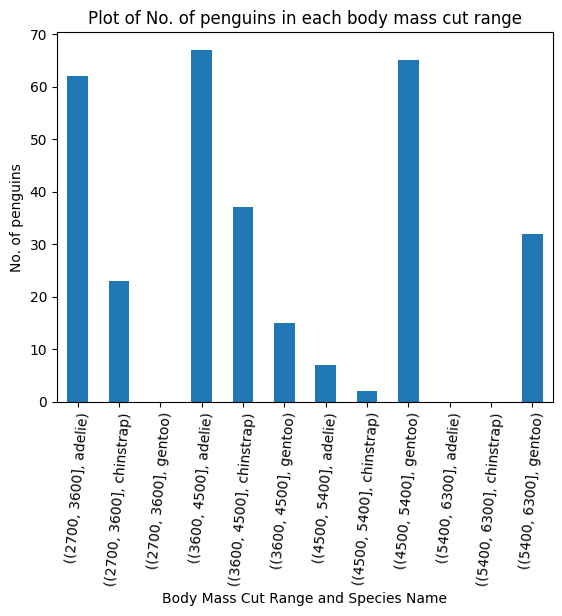

In [31]:
'''
No. of penguins in each species in different cut ranges of body mass in gms
'''

penguins_with_cutrange = penguins_impuned.copy(deep = True)
penguins_with_cutrange['body_mass_g_cut_range'] = pd.cut(penguins_with_cutrange.body_mass_g, np.array([2700, 3600, 4500, 5400, 6300]))

ax = penguins_with_cutrange.groupby(by = ['body_mass_g_cut_range','species'], sort = True).size().plot.bar(rot = 0.1)
ax.set_title('Plot of No. of penguins in each body mass cut range')
ax.set_xlabel('Body Mass Cut Range and Species Name')
ax.set_ylabel('No. of penguins')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
plt.show()

In [32]:
#Normalization
penguins_normalized = penguins_impuned.copy(deep = True)
penguins_normalized['calorie requirement'] = penguins_normalized['calorie requirement'].sub(penguins_normalized['calorie requirement'].min()).div((penguins_normalized['calorie requirement'].max()-penguins_normalized['calorie requirement'].min()))
penguins_normalized['average sleep duration'] = penguins_normalized['average sleep duration'].sub(penguins_normalized['average sleep duration'].min()).div((penguins_normalized['average sleep duration'].max()-penguins_normalized['average sleep duration'].min()))
penguins_normalized['bill_length_mm'] = penguins_normalized['bill_length_mm'].sub(penguins_normalized['bill_length_mm'].min()).div((penguins_normalized['bill_length_mm'].max()-penguins_normalized['bill_length_mm'].min()))
penguins_normalized['bill_depth_mm'] = penguins_normalized['bill_depth_mm'].sub(penguins_normalized['bill_depth_mm'].min()).div((penguins_normalized['bill_depth_mm'].max()-penguins_normalized['bill_depth_mm'].min()))
penguins_normalized['flipper_length_mm'] = penguins_normalized['flipper_length_mm'].sub(penguins_normalized['flipper_length_mm'].min()).div((penguins_normalized['flipper_length_mm'].max()-penguins_normalized['flipper_length_mm'].min()))
penguins_normalized['body_mass_g'] = penguins_normalized['body_mass_g'].sub(penguins_normalized['body_mass_g'].min()).div((penguins_normalized['body_mass_g'].max()-penguins_normalized['body_mass_g'].min()))

In [33]:
penguins_normalized.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,male,2007.0
1,adelie,torgersen,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,female,2007.0
2,adelie,torgersen,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,female,2007.0
4,adelie,torgersen,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,female,2007.0
5,adelie,torgersen,0.243434,0.857143,0.261818,0.892857,0.305085,0.263889,male,2007.0


In [34]:
#One hot encoding
penguins_cleaned = pd.get_dummies(penguins_normalized, columns = ['gender','species','island'])

In [35]:
penguins_cleaned.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender_female,gender_male,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
0,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,2007.0,0,1,1,0,0,0,0,1
1,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,2007.0,1,0,1,0,0,0,0,1
2,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,2007.0,1,0,1,0,0,0,0,1
4,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,2007.0,1,0,1,0,0,0,0,1
5,0.243434,0.857143,0.261818,0.892857,0.305085,0.263889,2007.0,0,1,1,0,0,0,0,1


In [36]:
cleanedCorrMatrix = penguins_cleaned.corr()
cleanedCorrMatrix

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender_female,gender_male,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
calorie requirement,1.000000,-0.042879,-0.025440,-0.091062,-0.002946,0.016802,-0.017163,0.015871,-0.015871,0.025022,-0.083667,0.044194,0.049650,-0.072039,0.028932
average sleep duration,-0.042879,1.000000,0.038190,0.010569,0.070050,0.087355,0.016947,-0.083965,0.083965,0.022146,-0.050682,0.019549,0.009320,-0.040051,0.042834
bill_length_mm,-0.025440,0.038190,1.000000,-0.206461,0.656966,0.594712,0.039952,-0.364078,0.364078,-0.831746,0.443358,0.488289,0.214610,0.031137,-0.357862
bill_depth_mm,-0.091062,0.010569,-0.206461,1.000000,-0.551785,-0.457652,-0.052420,-0.368773,0.368773,0.513827,0.327055,-0.804800,-0.606858,0.455258,0.245935
flipper_length_mm,-0.002946,0.070050,0.656966,-0.551785,1.000000,0.868811,0.161882,-0.274961,0.274961,-0.683485,-0.175439,0.853176,0.582917,-0.409350,-0.275637
body_mass_g,0.016802,0.087355,0.594712,-0.457652,0.868811,1.000000,0.037719,-0.437242,0.437242,-0.551223,-0.294309,0.816027,0.612400,-0.459907,-0.247490
year,-0.017163,0.016947,0.039952,-0.052420,0.161882,0.037719,1.000000,-0.003394,0.003394,0.003523,-0.049737,0.038002,0.075573,-0.061738,-0.023515
gender_female,0.015871,-0.083965,-0.364078,-0.368773,-0.274961,-0.437242,-0.003394,1.000000,-1.000000,0.021469,-0.003139,-0.019557,-0.009678,-0.006008,0.022629
gender_male,-0.015871,0.083965,0.364078,0.368773,0.274961,0.437242,0.003394,-1.000000,1.000000,-0.021469,0.003139,0.019557,0.009678,0.006008,-0.022629
species_adelie,0.025022,0.022146,-0.831746,0.513827,-0.683485,-0.551223,0.003523,0.021469,-0.021469,1.000000,-0.444319,-0.661352,-0.321269,0.015442,0.448227


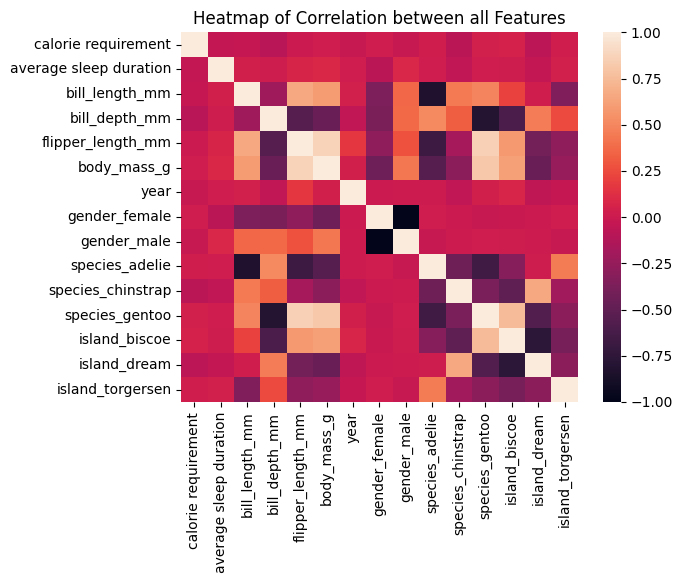

In [37]:
'''
Heatmap for correlation between all features
'''
fig = sb.heatmap(cleanedCorrMatrix).set(title = "Heatmap of Correlation between all Features")
plt.show()

In [38]:
penguins_dropped = penguins_cleaned.drop(columns = ['calorie requirement','year','species_chinstrap','species_adelie','species_gentoo','island_biscoe','island_dream','island_torgersen'])

In [39]:
penguins_dropped.head()

,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_female,gender_male
0,0.571429,0.254545,0.666667,0.152542,0.291667,0,1
1,1.000000,0.269091,0.511905,0.237288,0.305556,1,0
2,0.571429,0.298182,0.583333,0.389831,0.152778,1,0
4,0.142857,0.167273,0.738095,0.355932,0.208333,1,0
5,0.857143,0.261818,0.892857,0.305085,0.263889,0,1


In [40]:
penguins_dropped.corr()

,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_female,gender_male
average sleep duration,1.000000,0.038190,0.010569,0.070050,0.087355,-0.083965,0.083965
bill_length_mm,0.038190,1.000000,-0.206461,0.656966,0.594712,-0.364078,0.364078
bill_depth_mm,0.010569,-0.206461,1.000000,-0.551785,-0.457652,-0.368773,0.368773
flipper_length_mm,0.070050,0.656966,-0.551785,1.000000,0.868811,-0.274961,0.274961
body_mass_g,0.087355,0.594712,-0.457652,0.868811,1.000000,-0.437242,0.437242
gender_female,-0.083965,-0.364078,-0.368773,-0.274961,-0.437242,1.000000,-1.000000
gender_male,0.083965,0.364078,0.368773,0.274961,0.437242,-1.000000,1.000000


In [41]:
penguins_dropped.to_csv('data/penguins_preprocessed.csv', index=False)

In [42]:
penguins_dropped.shape

(311, 7)

# Preprocessing Diamonds Dataset

In [43]:
diamond = pd.read_csv('data/diamond.csv')

In [44]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [45]:
diamond.dtypes

Unnamed: 0                              object
carat                                   object
cut                                     object
color                                   object
clarity                                 object
average us salary                        int64
number of diamonds mined (millions)    float64
depth                                   object
table                                   object
price                                   object
x                                       object
y                                       object
z                                       object
dtype: object

In [46]:
diamond.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [47]:
#Convert numerical features stored as string to numeric type
diamond['carat'] = pd.to_numeric(diamond['carat'],errors='coerce')
diamond['x'] = pd.to_numeric(diamond['x'],errors='coerce')
diamond['y'] = pd.to_numeric(diamond['y'],errors='coerce')
diamond['z'] = pd.to_numeric(diamond['z'],errors='coerce')
diamond['depth'] = pd.to_numeric(diamond['depth'],errors='coerce')
diamond['table'] = pd.to_numeric(diamond['table'],errors='coerce')
diamond['price'] = pd.to_numeric(diamond['price'],errors='coerce')

In [48]:
diamond.describe()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,51073.000000,53940.000000,53940.000000,51866.000000,51030.000000,51844.000000,51027.000000,52208.000000,51532.000000
mean,0.797823,39521.990100,2.902669,61.750175,57.456332,3933.022047,5.731451,5.734517,3.538203
std,0.473747,5486.892971,1.325985,1.433485,2.231611,3989.013631,1.121433,1.142543,0.706057
min,0.200000,30000.000000,0.600000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,34780.000000,1.750000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,39547.500000,2.910000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,44252.000000,4.050000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.030000
max,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [49]:
diamond.head(100)

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.70,Good,E,VS2,39791,0.96,57.5,58.0,2759.0,5.85,5.90,3.38
96,97,0.70,Good,F,VS1,40460,2.47,59.4,62.0,2759.0,5.71,5.76,3.40
97,FALSE,NaN,Fair,F,FALSE,45321,3.92,66.3,NaN,2759.0,NaN,NaN,NaN
98,99,NaN,NaN,E,SI1,32659,4.89,61.6,59.0,NaN,5.77,NaN,3.56


In [50]:
diamond.rename(columns = {'Unnamed: 0':'index'},inplace = True)

In [51]:
#Standardizing text features
diamond['color'] = diamond['color'].str.lower()
diamond['clarity'] = diamond['clarity'].str.lower()
diamond['cut'] = diamond['cut'].str.lower()

In [52]:
diamond.head()

,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,ideal,e,si2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,premium,e,si1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,premium,i,vs2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,good,j,si2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75


In [53]:
diamond.isna().sum()

index                                   377
carat                                  2867
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [54]:
diamond.shape

(53940, 13)

In [55]:
diamond.cut.unique()

array(['ideal', 'premium', 'good', 'very good', nan, 'fair', 'maybe',
       'false', 'true'], dtype=object)

In [56]:
diamond.color.unique()

array(['e', 'i', 'j', 'h', 'f', 'g', 'd', nan, 'maybe', 'true', 'false'],
      dtype=object)

In [57]:
diamond.clarity.unique()

array(['si2', 'si1', 'vs1', 'vs2', 'vvs2', 'vvs1', 'i1', 'maybe', 'false',
       'if', nan, 'true'], dtype=object)

In [58]:
#Replacing invalid values with na
diamond = diamond.replace({
            'cut':{'maybe':np.nan,'false':np.nan,'true':np.nan},
            'color':{'maybe':np.nan,'false':np.nan,'true':np.nan},
            'clarity':{'maybe':np.nan,'false':np.nan,'true':np.nan,'if':np.nan}
            })

In [59]:
diamond.isna().sum()

index                                   377
carat                                  2867
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [60]:
#Replacing na values
diamond_numerical_na_filled = diamond.fillna(value = {
    'depth':diamond['depth'].median(),
    'table':diamond['table'].median(),
    'carat':diamond['carat'].median(),
    'x':diamond['x'].median(),
    'y':diamond['y'].median(),
    'z':diamond['z'].median()})

In [61]:
diamond_numerical_na_filled.shape

(53940, 13)

In [62]:
diamond_numerical_na_filled.loc[diamond_numerical_na_filled.isna().any(axis=1)]

,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
7,8,0.70,NaN,h,si1,37587,4.62,61.8,57.0,NaN,4.07,4.11,2.53
45,46,0.70,premium,NaN,NaN,31322,1.45,61.8,58.0,NaN,4.24,4.26,3.53
50,51,0.70,NaN,NaN,si1,36709,3.74,61.8,61.0,404.0,5.70,4.03,2.45
61,NaN,0.70,premium,NaN,si1,32760,1.23,61.8,59.0,552.0,4.23,4.27,3.53
70,FALSE,0.70,NaN,NaN,vvs1,47906,1.38,61.8,57.0,NaN,5.70,5.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53896,53897,0.83,NaN,NaN,si2,38225,0.85,62.4,57.0,2751.0,6.01,6.08,3.77
53911,53912,0.57,premium,e,NaN,39378,2.87,59.8,60.0,2753.0,5.43,5.38,3.23
53915,53916,0.70,ideal,NaN,si2,30041,3.49,62.1,57.0,NaN,5.70,5.86,3.63
53924,NaN,0.70,ideal,i,vs2,35789,2.33,61.6,55.0,2756.0,5.70,5.84,3.53


In [63]:
diamond_numerical_na_filled.isna().sum()

index                                   377
carat                                     0
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                     0
table                                     0
price                                  2096
x                                         0
y                                         0
z                                         0
dtype: int64

In [64]:
#Fill na values in index using interpoaltion
diamond_numerical_na_filled['index'] = diamond_numerical_na_filled['index'].interpolate(method = 'linear')

In [65]:
#Fill na values in price using interpolation
diamond_numerical_na_filled['price'] = diamond_numerical_na_filled['price'].interpolate(method = 'linear')

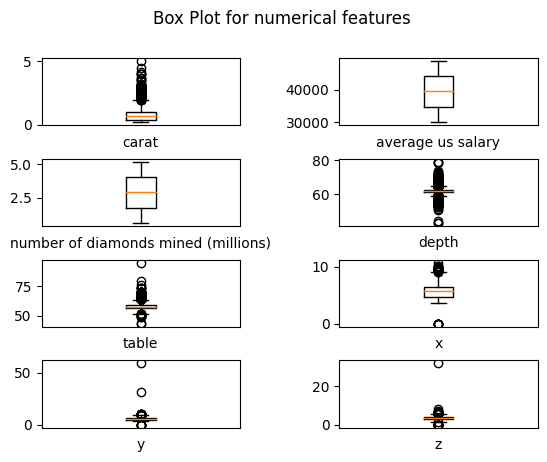

In [66]:
'''
Box Plots for numerical features
'''
fig, axs = plt.subplots(nrows = 4, ncols = 2)

axs[0][0].boxplot(diamond_numerical_na_filled['carat'])
axs[0][0].set_xticks([])
axs[0][0].set_xlabel('carat')

axs[0][1].boxplot(diamond_numerical_na_filled['average us salary'])
axs[0][1].set_xticks([])
axs[0][1].set_xlabel('average us salary')

axs[1][0].boxplot(diamond_numerical_na_filled['number of diamonds mined (millions)'])
axs[1][0].set_xticks([])
axs[1][0].set_xlabel('number of diamonds mined (millions)')

axs[1][1].boxplot(diamond_numerical_na_filled['depth'])
axs[1][1].set_xticks([])
axs[1][1].set_xlabel('depth')

axs[2][0].boxplot(diamond_numerical_na_filled['table'])
axs[2][0].set_xticks([])
axs[2][0].set_xlabel('table')

axs[2][1].boxplot(diamond_numerical_na_filled['x'])
axs[2][1].set_xticks([])
axs[2][1].set_xlabel('x')

axs[3][0].boxplot(diamond_numerical_na_filled['y'])
axs[3][0].set_xticks([])
axs[3][0].set_xlabel('y')

axs[3][1].boxplot(diamond_numerical_na_filled['z'])
axs[3][1].set_xticks([])
axs[3][1].set_xlabel('z')

fig.suptitle('Box Plot for numerical features')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [67]:
#Drop rows with na values
diamond_impuned = diamond_numerical_na_filled.dropna()

In [68]:
diamond_impuned.shape

(47837, 13)

In [69]:
#Outlier Removal
def outlierArray(df, colName, alpha = 1.5):
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - alpha*IQR
    upper = Q3 + alpha*IQR

    outlierArray = df[(df[colName] < lower) | (df[colName] > upper)]
    
    return outlierArray

In [70]:
outlierIndex = outlierArray(diamond_impuned, 'depth', 1.5)
diamond_impuned.loc[outlierIndex.index, 'depth'] = diamond_impuned['depth'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2,3,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
8,9,0.22,fair,e,vs2,30454,4.02,65.1,61.0,337.0,3.87,3.78,2.49
24,25,0.31,very good,j,si1,39073,4.10,58.1,62.0,353.0,4.44,4.47,2.59
35,36,0.23,good,f,vs1,45958,5.15,58.2,59.0,402.0,4.06,4.08,2.37
42,43,0.26,good,d,vs2,37441,3.96,65.2,56.0,403.0,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53879,53880,1.04,fair,g,si2,44018,3.38,65.2,57.0,2745.0,6.25,6.23,4.07
53882,53883,0.71,fair,d,vs1,31579,4.28,65.4,59.0,2747.0,5.62,5.58,3.66
53886,53887,0.70,good,d,vs2,40937,1.53,58.0,62.0,2749.0,5.78,5.87,3.38
53895,53896,0.70,good,f,vs1,43085,3.56,57.8,61.0,2751.0,5.83,5.79,3.36


In [71]:
outlierIndex = outlierArray(diamond_impuned, 'table', 1.5)
diamond_impuned.loc[outlierIndex.index, 'table'] = diamond_impuned['table'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2,3,0.23,good,e,vs1,33517,3.85,61.8,65.0,327.0,4.05,4.07,2.31
91,92,0.86,fair,e,si2,35889,4.08,61.8,69.0,2757.0,6.45,6.33,3.52
145,146,0.70,good,h,vvs2,40755,1.55,62.1,64.0,2767.0,5.62,5.65,3.50
219,220,0.53,very good,d,vvs2,30552,4.45,61.8,64.0,2782.0,5.34,5.37,3.08
239,240,0.77,good,g,vs1,44656,2.84,59.4,64.0,2788.0,5.97,5.92,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53695,53696,0.75,good,e,vs2,48733,3.87,59.7,65.0,2717.0,5.85,5.80,3.48
53697,53698,0.70,fair,h,vvs2,44938,0.85,64.5,65.0,2717.0,5.52,5.45,3.54
53756,53757,0.84,fair,g,vs1,41221,1.69,61.8,64.0,2724.0,6.42,6.32,3.54
53757,53758,0.72,fair,f,vs2,32735,3.95,61.8,64.0,2724.0,6.06,5.97,3.34


In [72]:
outlierIndex = outlierArray(diamond_impuned, 'carat', 1.5)
diamond_impuned.loc[outlierIndex.index, 'carat'] = diamond_impuned['carat'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
12246,12247,2.06,premium,j,i1,40497,0.90,61.2,58.0,5203.0,8.10,8.07,4.95
13002,13003,2.14,fair,j,i1,31965,2.97,61.8,57.0,5405.0,7.74,7.70,5.36
13118,13119,2.15,fair,j,i1,42063,1.46,61.8,57.0,5430.0,8.01,7.95,5.23
13757,13758,2.22,fair,j,i1,46284,2.53,61.8,56.0,5607.0,8.04,8.02,5.36
14138,14139,2.27,fair,j,i1,33801,2.67,61.8,55.0,5733.0,8.05,8.00,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27741,27742,2.15,ideal,g,si2,31876,0.82,62.6,54.0,18791.0,8.29,8.35,5.21
27742,27743,2.04,premium,h,si1,32337,4.02,61.8,60.0,18795.0,8.37,8.28,4.84
27744,27745,2.29,premium,i,si1,44106,0.80,61.8,59.0,18797.0,8.52,8.45,5.24
27746,27747,2.07,ideal,g,si2,38530,4.08,62.5,55.0,18804.0,8.20,8.13,5.11


In [73]:
outlierIndex = outlierArray(diamond_impuned, 'x', 1.5)
diamond_impuned.loc[outlierIndex.index, 'x'] = diamond_impuned['x'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
11182,11183,1.07,ideal,f,si2,47952,2.68,61.6,56.0,4954.0,0.00,6.62,0.00
11963,11964,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,0.00,0.00,0.00
15951,15952,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,0.00,0.00,0.00
22741,22742,0.71,fair,h,i1,44891,1.84,61.8,62.0,10761.0,9.54,9.38,5.31
22831,22832,0.71,good,i,i1,33254,4.87,61.8,57.0,10863.0,9.38,9.31,5.33
23644,23645,0.71,fair,h,i1,39683,3.62,61.8,53.0,11668.0,9.53,9.48,6.38
24131,24132,0.71,premium,h,i1,35790,4.83,62.1,58.0,12300.0,9.44,9.40,5.85
24297,24298,0.71,ideal,i,i1,47761,4.56,62.6,55.0,12545.0,9.49,9.42,5.92
24328,24329,0.71,ideal,h,i1,35509,1.76,62.8,57.0,12587.0,9.65,9.59,6.03
24520,24521,1.56,ideal,g,vs2,48296,1.90,62.2,54.0,12800.0,0.00,0.00,0.00


In [74]:
outlierIndex = outlierArray(diamond_impuned, 'y', 1.5)
diamond_impuned.loc[outlierIndex.index, 'y'] = diamond_impuned['y'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
11963,11964,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,5.71,0.00,0.00
15951,15952,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,5.71,0.00,0.00
22428,22429,0.71,premium,e,i1,46589,2.44,60.9,58.0,10453.0,9.26,9.25,5.66
22741,22742,0.71,fair,h,i1,44891,1.84,61.8,62.0,10761.0,5.71,9.38,5.31
22831,22832,0.71,good,i,i1,33254,4.87,61.8,57.0,10863.0,5.71,9.31,5.33
23644,23645,0.71,fair,h,i1,39683,3.62,61.8,53.0,11668.0,5.71,9.48,6.38
24067,24068,2.00,premium,h,si2,37332,0.76,61.8,57.0,12210.0,8.09,58.90,8.06
24131,24132,0.71,premium,h,i1,35790,4.83,62.1,58.0,12300.0,5.71,9.40,5.85
24297,24298,0.71,ideal,i,i1,47761,4.56,62.6,55.0,12545.0,5.71,9.42,5.92
24328,24329,0.71,ideal,h,i1,35509,1.76,62.8,57.0,12587.0,5.71,9.59,6.03


In [75]:
outlierIndex = outlierArray(diamond_impuned, 'z', 1.5)
diamond_impuned.loc[outlierIndex.index, 'z'] = diamond_impuned['z'].median()
outlierIndex

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2207,2208,1.00,premium,g,si2,41620,3.63,59.1,59.0,3142.0,6.55,6.48,0.00
2314,2315,1.01,premium,h,i1,42225,1.65,61.8,59.0,3167.0,6.66,6.60,0.00
4791,4792,1.10,premium,g,si2,41918,0.85,63.0,59.0,3696.0,6.50,6.47,0.00
5471,5472,1.01,premium,f,si2,45800,3.48,59.2,58.0,3837.0,6.50,6.47,0.00
11182,11183,1.07,ideal,f,si2,47952,2.68,61.6,56.0,4954.0,5.71,6.62,0.00
11963,11964,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,5.71,5.73,0.00
13601,13602,1.15,ideal,g,vs2,38734,2.74,59.2,56.0,5564.0,6.88,6.83,0.00
15951,15952,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,5.71,5.73,0.00
17196,17197,0.71,fair,j,i1,38560,3.44,61.8,56.0,6870.0,8.46,8.43,5.76
19346,19347,0.71,fair,h,i1,45818,2.05,61.8,57.0,8044.0,8.93,8.84,5.97


In [76]:
#Normalization
diamond_impuned['depth'] = diamond_impuned['depth'].sub(diamond_impuned['depth'].min()).div((diamond_impuned['depth'].max()-diamond_impuned['depth'].min()))
diamond_impuned['table'] = diamond_impuned['table'].sub(diamond_impuned['table'].min()).div((diamond_impuned['table'].max()-diamond_impuned['table'].min()))
diamond_impuned['carat'] = diamond_impuned['carat'].sub(diamond_impuned['carat'].min()).div((diamond_impuned['carat'].max()-diamond_impuned['carat'].min()))
diamond_impuned['x'] = diamond_impuned['x'].sub(diamond_impuned['x'].min()).div((diamond_impuned['x'].max()-diamond_impuned['x'].min()))
diamond_impuned['y'] = diamond_impuned['y'].sub(diamond_impuned['y'].min()).div((diamond_impuned['y'].max()-diamond_impuned['y'].min()))
diamond_impuned['z'] = diamond_impuned['z'].sub(diamond_impuned['z'].min()).div((diamond_impuned['z'].max()-diamond_impuned['z'].min()))
diamond_impuned['average us salary'] = diamond_impuned['average us salary'].sub(diamond_impuned['average us salary'].min()).div((diamond_impuned['average us salary'].max()-diamond_impuned['average us salary'].min()))
diamond_impuned['number of diamonds mined (millions)'] = diamond_impuned['number of diamonds mined (millions)'].sub(diamond_impuned['number of diamonds mined (millions)'].min()).div((diamond_impuned['number of diamonds mined (millions)'].max()-diamond_impuned['number of diamonds mined (millions)'].min()))

C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\surya_eyj1nxg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

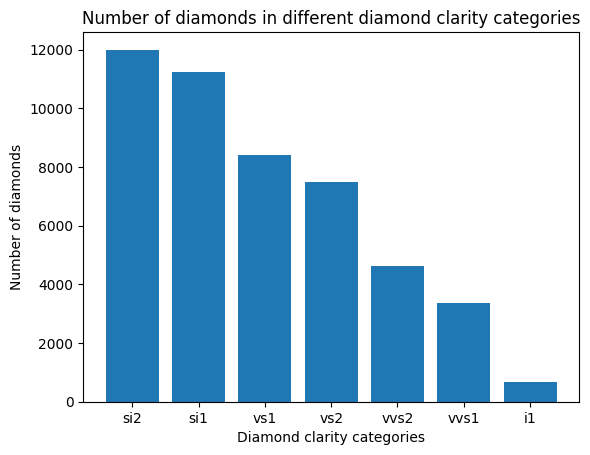

In [77]:
'''
Plot of number of diamonds in different diamond clarity categories
'''
plt.bar(diamond_impuned['clarity'].unique(),diamond_impuned['clarity'].value_counts())
plt.title("Number of diamonds in different diamond clarity categories")
plt.xlabel("Diamond clarity categories")
plt.ylabel("Number of diamonds")
plt.show()

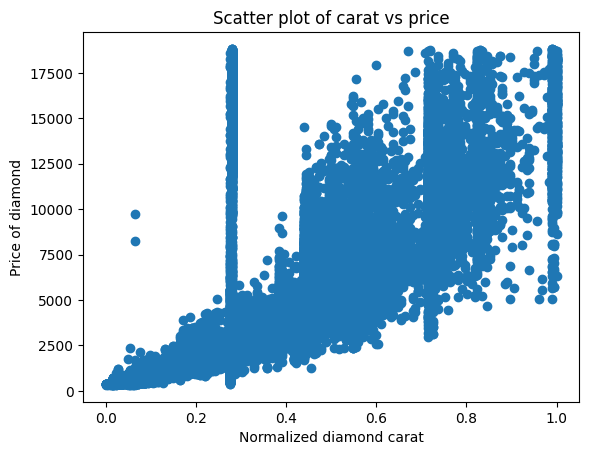

In [78]:
'''
Scatter plot of carats of diamond vs price of diamond
'''
plt.scatter(diamond_impuned['carat'],diamond_impuned['price'],)
plt.xlabel("Normalized diamond carat")
plt.ylabel("Price of diamond")
plt.title("Scatter plot of carat vs price")
plt.show()

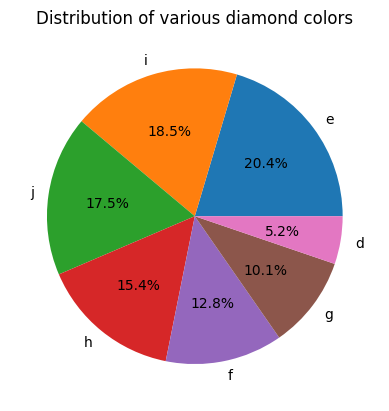

In [79]:
'''
Pie Plot of No. of diamonds in different colors
'''
plt.pie(diamond_impuned['color'].value_counts(),labels=diamond_impuned['color'].unique(),autopct='%1.1f%%')
plt.title("Distribution of various diamond colors")
plt.show()

In [80]:
#One Hot encoding
diamond_cleaned = pd.get_dummies(diamond_impuned,columns = ['cut','color','clarity'])

In [81]:
cleanedCorrMatrix = diamond_cleaned.corr()
cleanedCorrMatrix

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,cut_fair,...,color_h,color_i,color_j,clarity_i1,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
carat,1.000000,0.003242,-0.009594,0.024619,0.168756,0.803997,0.904012,0.902887,0.903729,0.082655,...,0.103261,0.130312,0.131511,0.082715,0.067711,0.211352,-0.052895,-0.033275,-0.176420,-0.138957
average us salary,0.003242,1.000000,0.001152,0.000517,0.000059,0.007494,0.004536,0.004628,0.004087,-0.005180,...,-0.001556,-0.003504,-0.002795,-0.004252,0.001857,-0.003709,0.000827,0.009845,-0.004437,-0.007533
number of diamonds mined (millions),-0.009594,0.001152,1.000000,-0.000974,-0.003436,-0.012980,-0.010260,-0.009865,-0.011125,-0.005091,...,-0.003647,-0.003132,-0.004263,-0.003440,-0.000452,-0.006028,0.001456,0.007711,-0.002541,-0.000848
depth,0.024619,0.000517,-0.000974,1.000000,-0.215347,-0.007223,-0.018629,-0.020496,0.069311,0.053728,...,0.015814,0.023444,0.021943,0.012099,0.052714,0.013052,-0.026581,-0.011124,-0.028263,-0.025840
table,0.168756,0.000059,-0.003436,-0.215347,1.000000,0.125084,0.182072,0.177352,0.147413,0.025251,...,0.017222,0.017997,0.032218,0.037134,0.048265,0.087615,-0.037155,-0.012602,-0.074723,-0.069973
price,0.803997,0.007494,-0.012980,-0.007223,0.125084,1.000000,0.883471,0.886885,0.878419,0.017801,...,0.065380,0.101787,0.080069,-0.001737,0.002924,0.126698,-0.012542,-0.005065,-0.099166,-0.058099
x,0.904012,0.004536,-0.010260,-0.018629,0.182072,0.883471,1.000000,0.994847,0.985518,0.076962,...,0.101457,0.148112,0.161258,0.098149,0.067986,0.264867,-0.068521,-0.048302,-0.194237,-0.158244
y,0.902887,0.004628,-0.009865,-0.020496,0.177352,0.886885,0.994847,1.000000,0.985504,0.067165,...,0.099791,0.149742,0.161985,0.092685,0.068264,0.263268,-0.068077,-0.048128,-0.192586,-0.156625
z,0.903729,0.004087,-0.011125,0.069311,0.147413,0.878419,0.985518,0.985504,1.000000,0.107659,...,0.103478,0.149770,0.162489,0.104431,0.071779,0.263839,-0.070685,-0.049591,-0.195737,-0.159194
cut_fair,0.082655,-0.005180,-0.005091,0.053728,0.025251,0.017801,0.076962,0.067165,0.107659,1.000000,...,0.016206,0.005538,0.017233,0.179196,0.000677,0.051904,-0.023670,-0.029735,-0.042552,-0.031102


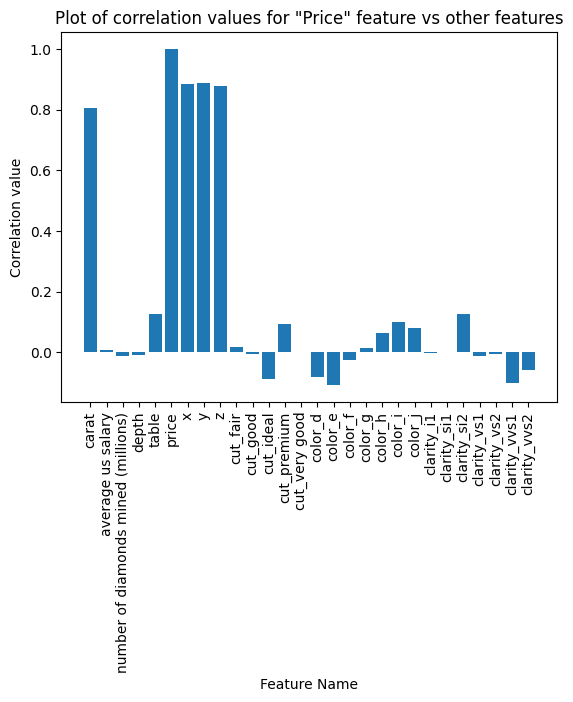

In [82]:
'''
Correlation graph for price feature vs other features
'''
fig = plt.bar(cleanedCorrMatrix['price'].index,cleanedCorrMatrix['price'])
plt.xlabel("Feature Name")
plt.ylabel("Correlation value")
plt.title("Plot of correlation values for \"Price\" feature vs other features")
plt.xticks(rotation=90)
plt.show()

In [83]:
diamond_dropped = diamond_cleaned.drop(columns = ['index','average us salary','number of diamonds mined (millions)','depth','cut_fair','cut_good','cut_ideal','cut_premium','cut_very good'])

In [84]:
diamond_dropped.head(100)

,carat,table,price,x,y,z,color_d,color_e,color_f,color_g,color_h,color_i,color_j,clarity_i1,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.016484,0.285714,326.0,0.039783,0.054348,0.238318,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.005495,0.789916,326.0,0.028933,0.028986,0.210280,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.016484,0.453782,327.0,0.057866,0.070652,0.210280,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.049451,0.537815,334.0,0.084991,0.099638,0.285047,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.060440,0.537815,335.0,0.110307,0.121377,0.313084,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.296703,0.285714,2760.0,0.374322,0.393116,0.509346,0,0,0,1,0,0,0,0,1,0,0,0,0,0
103,0.302198,0.537815,2760.0,0.383363,0.382246,0.509346,0,0,0,1,0,0,0,0,0,0,0,1,0,0
104,0.329670,0.369748,2760.0,0.399638,0.396739,0.539720,0,0,0,0,0,1,0,0,0,0,1,0,0,0
105,0.302198,0.285714,2760.0,0.386980,0.384058,0.518692,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [85]:
diamond_dropped.to_csv('data/diamond_preprocessed.csv', index=False)

In [86]:
diamond_dropped.shape

(47837, 20)

#### References
1) https://docs.python.org/3/index.html
2) https://matplotlib.org/stable/
3) https://seaborn.pydata.org/api.html
4) https://pandas.pydata.org/docs/reference/index.html
5) https://numpy.org/doc/stable/index.html